# Lab 2: Machine Learning Supervised Regression 

References: 
- [The Machine Learning Simplified: A Gentle Introduction to Supervised Learning](https://www.amazon.com/dp/B0B216KMM4/qid=1653304321)
- [Machine Learning for Neuroscience Notebook](https://github.com/PBarnaghi/ML4NS/blob/main/00-%20Tutorials/Machine%20Learning%20for%20Beginners%20Tutorial%20and%20Assessment/Machine%20Learning%20for%20Beginners%20(run).ipynb)

In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# let's use the diabetes dataset now 
### i.e., The Data Extraction step

from sklearn import datasets
data = datasets.load_diabetes(as_frame=True) # this loads the dataset as a dictionary
features_original = data.data # this derives features as a dataframe (10 features by 442 instances)
labels_original = data.target # this derives a continuous-valued attribute as a dataframe (442 instances)

In [3]:
features_original

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [4]:
labels_original

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

You might think the features dataframe looks a bit odd. This is because each of the 10 feature variables have already been mean centred and scaled by the product of the standard deviation and number of samples (i.e. the sum of squares of each column totals 1) to bring them to a common scale.

First, let's check the linear correlation between variables in the dataframe.

## **1. Single Linear Regression**

- Our task is a linear regression task i.e., using one variable we predict another. 
- so selecting a feature (say, bmi) for simulating linear regresssion. 

In [5]:
### 0. Data Retrieval & Collection
# Extract only the BMI feature
features = features_original[['bmi']]
labels = labels_original.copy()

### 1. Data Cleaning: Data is clean 

### 2. Feature Design
# No additional feature design needed for this simple example

### 3. Algorithm Selection: Regression algorithm - Linear Regression

### 4. Loss function selection: Mean Squared Error (MSE)
# We will use the default MSE from sklearn's LinearRegression model

### 5. Model Training 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
                                        features, 
                                        labels, 
                                        test_size = 0.20, 
                                        shuffle=True, 
                                        random_state = 42
                                        )

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

## 6. Model Validation
pred_y = model.predict(x_test)

from sklearn import metrics as mt
print("The R² score of the model is", np.round(mt.r2_score(y_test,pred_y),2))
print("The Mean Absolute Error of model is", np.round(mt.mean_absolute_error(y_test,pred_y),2))
print("The Mean Squared Error of the model is" , np.round(mt.mean_squared_error(y_test,pred_y),2))

The R² score of the model is 0.23
The Mean Absolute Error of model is 52.26
The Mean Squared Error of the model is 4061.83


<div style="display: flex; justify-content: center; gap: 10px;">
  <img src="https://www.reneshbedre.com/assets/posts/reg/reg_front.svg" alt="Image 1" width="420" height="280">
  <img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhlWvz8u_TkTQFKK1PTzyTGEkXVyjkCuCYL1H4DAvtqUaMsSm96y0paEoaOWmkyHiy3Boh4ZXxP713mpyASHRk9GBHzJVpRe7twp_JYkSvzoS0emMefSGe2K_YfiYcgBG6PYGb7LlQQ3j0/s1600/formula-MAE-MSE-RMSE-RSquared.JPG" alt="Image 2" width="420" height="280">
</div>

In [11]:
# derives the coefficient for each variable from the trained model
coef = pd.Series(model.coef_, index=x_train.columns) 
coef

bmi    998.577689
dtype: float64

In [8]:
# intercept
intercept = model.intercept_ # derives the model intercept
intercept

np.float64(152.00335421448167)

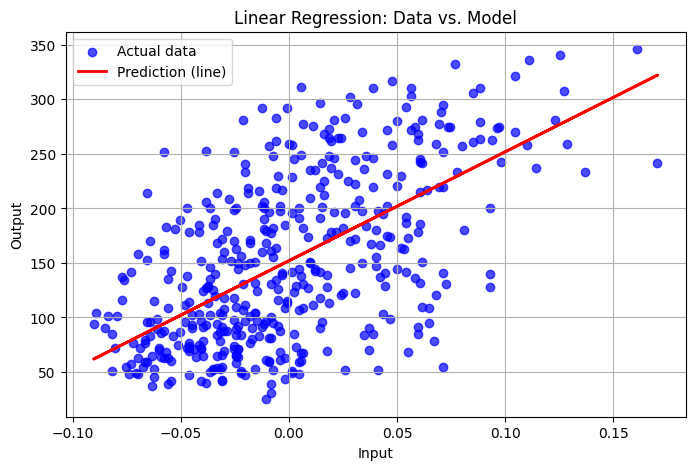

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Your data (replace with your values)
X = features.values  # input values
y = labels.values      # output values

# Your model parameters
coef = int(coef.values[0])             # slope (θ1)
intercept = int(intercept)          # intercept (θ0)

# Compute predictions
y_pred = coef * X + intercept

# Plot
plt.figure(figsize=(8, 5))

# Scatter plot of actual data
plt.scatter(X, y, color="blue", label="Actual data", alpha=0.7)

# Regression line
plt.plot(X, y_pred, color="red", label="Prediction (line)", linewidth=2)

plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Linear Regression: Data vs. Model")
plt.legend()
plt.grid(True)
plt.show()


## **2. Multile Linear Regression**

Regression involves predicting a continuous-valued attribute associated with an object.



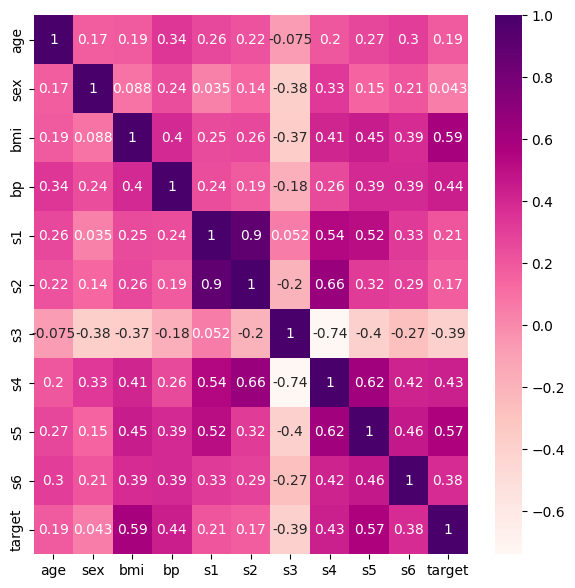

In [ ]:
df = pd.concat([features, labels], axis=1)

corr = df.corr()

# visualize the correlation matrix

plt.subplots(figsize=(7,7))
sns.heatmap(corr, cmap= 'RdPu', annot=True) # plots correlation matrix as a heatmap with values
plt.show()

- A correlation matrix shows pairwise relationships between variables with values from -1 to 1: numbers near 1 mean strong positive, near -1 strong negative, and near 0 little or no linear relationship.
- Use it to spot redundant features or promising predictors, but remember correlation ≠ causation and it only detects linear associations.

Remove a feature only if it hurts or does not help generalization; verify with cross‑validation, not just intuition.

Here, if two features are highly correlated with each other but only one is strongly correlated with the target, drop the weaker. If both help predict the target, keep them. 

So we can remove s2 as 0.17<0.26. 

In [ ]:
### 1. Data Cleaning: Data is clean 

### 2. Feature Design
features = features.drop(columns=['s2'], errors='ignore')

### 3. Algorithm Selection: Regression algorithm - Linear Regression

### 4. Loss function selection: Mean Squared Error (MSE)

### 5. Model Training 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20, shuffle=True, random_state = 42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

## 6. Model Validation
pred_y = model.predict(x_test)

from sklearn import metrics as mt
print("The R² score of the model is", np.round(mt.r2_score(y_test,pred_y),2))
print("The Mean Absolute Error of model is", np.round(mt.mean_absolute_error(y_test,pred_y),2))
print("The Mean Squared Error of the model is" , np.round(mt.mean_squared_error(y_test,pred_y),2))


The R² score of the model is 0.45
The Mean Absolute Error of model is 42.88
The Mean Squared Error of the model is 2900.25


Finally, we want to determine the coefficients and interecept of the regression equation as calculated by the model.

Regression coefficients tell you two things:

1. **Whether there was a positive or negative correlation between the independent variable and the dependent variable.**
    - If there is a positive correlation, as the value of the independent variable increases, the dependent variable also tends to increase. If there is a negative correlation, as the value of the independent variable increases, the dependent variable tends to decrease.

2. **The size of the effect of the independent variable on the dependent variable.**
    - The coefficient value signifies how much the mean of the dependent variable changes given a unit shift in the independent variable while all other variables are held constant.
    - The intercept represents the mean value of the dependent variable when all of the independent variables in the model are equal to zero.

**Example:** predicting house price

- Equation form: price = intercept + coef_size * size + coef_bed * bedrooms
- Intercept (baseline): the price the model would predict if size and bedrooms were zero. it is a baseline value (not always physically meaningful, but the model’s starting point).
- Coefficients: how much the price changes when you add one unit of a feature:
    - coef_size = dollars per extra square foot
    - coef_bed = dollars per extra bedroom

So if intercept = 50k, coef_size = 100, coef_bed = 20k, then a 1,000 sqft house with 2 bedrooms → price = 50k + 1001000 + 20k2 = 190k.

In [ ]:
# derives the coefficient for each variable from the trained model
coef = pd.Series(model.coef_, index=x_train.columns) 
coef

age     43.181123
sex   -241.376201
bmi    555.709752
bp     344.647390
s1    -316.745217
s3     -81.325629
s4     241.183507
s5     492.772265
s6      53.002574
dtype: float64

In [ ]:
intercept = model.intercept_ # derives the model intercept
# intercept

np.float64(151.3010031750481)

The regression equation as calculated by the model would be as follows:

Diabetes Progression = intercept + coef(1) x age + coef(2) x sex + coef(3) x bmi + coef(4) x bp + coef(5) x s1 + coef(6) x s2 + coef(7) x s3 + coef(8) x s4 + coef(9) x s5 + coef(10) x s6

# Resources

About Dataset: 
- [https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

Logistic Regression:
- [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

Scaling: 
- [https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)
- [https://towardsdatascience.com/feature-scaling-effectively-choose-input-variables-based-on-distributions-3032207c921f](https://towardsdatascience.com/feature-scaling-effectively-choose-input-variables-based-on-distributions-3032207c921f)

Standard Scalar: 
- [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

MinMax Scalar: 
- [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

Train-Test Split:
- [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/)

Evaluation Metrics for Linear Regression: 
- [https://towardsdatascience.com/performance-metrics-for-classification-machine-learning-problems-97e7e774a007](https://towardsdatascience.com/performance-metrics-for-classification-machine-learning-problems-97e7e774a007)

Cross-Validation: 
- [https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79](https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79)